# 커피 경험과 선호도의 상관관계 분석: 커피에 대한 전문성 수준과 커피의 선호도

In [86]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

In [3]:
file_path = 'C:/Users/Lenovo/Downloads/GACTT_RESULTS_ANONYMIZED.csv'
data = pd.read_csv(file_path)

data.head()

,Submission ID,Respondent ID,Submitted at,What is your age?,What is your ZIP code?,How many cups of coffee do you typically drink per day?,Where do you typically drink coffee?,Where do you typically drink coffee? (At home),Where do you typically drink coffee? (At the office),Where do you typically drink coffee? (On the go),...,Gender,Gender (please specify),Marital Status,Household Income,Education Level,Ethnicity/Race,Ethnicity/Race (please specify),Employment Status,Number of Children,Political Affiliation
0,gMR29l,vDzkBA,9/11/23 20:50,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BkPN0e,9Z4VME,9/11/23 20:52,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W5G8jj,XoNLQj,9/12/23 1:33,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4xWgGr,Gp7gde,9/12/23 12:58,35-44 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,QD27Q8,Bp9ogQ,9/12/23 15:24,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# 필요한 열만 선택하고 이 열들의 결측치 개수 확인
selected_columns = [
    'Lastly, how would you rate your own coffee expertise?',
    'How many cups of coffee do you typically drink per day?',
    'In total, much money do you typically spend on coffee in a month?',
    'Do you know where your coffee comes from?',
    'Approximately how much have you spent on coffee equipment in the past 5 years?',
    'Lastly, what was your favorite overall coffee?'
]
data_selected = data[selected_columns]

missing_values = data_selected.isnull().sum()
missing_values

Lastly, how would you rate your own coffee expertise?                             104
How many cups of coffee do you typically drink per day?                            93
In total, much money do you typically spend on coffee in a month?                 531
Do you know where your coffee comes from?                                         483
Approximately how much have you spent on coffee equipment in the past 5 years?    536
Lastly, what was your favorite overall coffee?                                    272
dtype: int64

#### 총 데이터셋 행이 4042개인데 3,4,5번째 열은 결측치 비율이 전체의 10%를 넘는 것을 알 수 있다.(6번째는 10% 까지는 아니지만 매우 중요한 변수이다.)

In [6]:
data_selected.dtypes

Lastly, how would you rate your own coffee expertise?                             float64
How many cups of coffee do you typically drink per day?                            object
In total, much money do you typically spend on coffee in a month?                  object
Do you know where your coffee comes from?                                          object
Approximately how much have you spent on coffee equipment in the past 5 years?     object
Lastly, what was your favorite overall coffee?                                     object
dtype: object

In [7]:
# 문자열들 데이터 범주 확인
print(data['How many cups of coffee do you typically drink per day?'].unique())
print(data['In total, much money do you typically spend on coffee in a month?'].unique())
print(data['Do you know where your coffee comes from?'].unique())
print(data['Approximately how much have you spent on coffee equipment in the past 5 years?'].unique())
print(data['Lastly, what was your favorite overall coffee?'].unique())

[nan 'Less than 1' '2' '1' '3' 'More than 4' '4']
[nan '>$100' '$40-$60' '$20-$40' '$60-$80' '<$20' '$80-$100']
[nan 'Yes' 'No']
[nan '$500-$1000' '$50-$100' '$100-$300' '$300-$500' 'More than $1,000'
 '$20-$50' 'Less than $20']
[nan 'Coffee B' 'Coffee D' 'Coffee A' 'Coffee C']


In [8]:
# 결측치가 없는 데이터에서 샘플링 (핫덱 방식)
available_values = data["Lastly, how would you rate your own coffee expertise?"].dropna()

data["Lastly, how would you rate your own coffee expertise?"] = data["Lastly, how would you rate your own coffee expertise?"].apply(
    lambda x: x if pd.notnull(x) else np.random.choice(available_values)
)

# 결과 출력
print(data["Lastly, how would you rate your own coffee expertise?"].head())

0    1.0
1    4.0
2    5.0
3    3.0
4    4.0
Name: Lastly, how would you rate your own coffee expertise?, dtype: float64


In [9]:
## 두번째 열 결측치 처리 
# "less than 1"을 0, "more than 4"를 5로 변환
data['How many cups of coffee do you typically drink per day?'] = data['How many cups of coffee do you typically drink per day?'].replace({
    'Less than 1': 0, 'More than 4': 5})

# 문자열을 float로 변환(이거 안하면 오류남)
data['How many cups of coffee do you typically drink per day?'] = pd.to_numeric(data['How many cups of coffee do you typically drink per day?'], errors='coerce')

# 평균값 계산 및 결측치 대체
mean_value = data['How many cups of coffee do you typically drink per day?'].mean()
data['How many cups of coffee do you typically drink per day?'] = data['How many cups of coffee do you typically drink per day?'].fillna(mean_value)

# 반올림하여 정수형 변환
data['How many cups of coffee do you typically drink per day?'] = data['How many cups of coffee do you typically drink per day?'].round().astype(int)

data['How many cups of coffee do you typically drink per day?'].head()

0    2
1    2
2    2
3    2
4    2
Name: How many cups of coffee do you typically drink per day?, dtype: int32

In [10]:
## 세번째 열은 결측치가 많은 편이라 Hot deck imputation사용함.

# 데이터를 숫자형으로 변환
data['In total, much money do you typically spend on coffee in a month?'] = data['In total, much money do you typically spend on coffee in a month?'].replace({
    '>$100': 110,
    '$40-$60': 50,
    '$20-$40': 30,
    '$60-$80': 70,
    '<$20': 10,
    '$80-$100': 90
}).astype(float)

# 결측치가 없는 데이터에서 샘플링 (핫덱 방식)
available_values = data['In total, much money do you typically spend on coffee in a month?'].dropna()

data['In total, much money do you typically spend on coffee in a month?'] = data['In total, much money do you typically spend on coffee in a month?'].apply(
    lambda x: x if pd.notnull(x) else np.random.choice(available_values)
)

print(data['In total, much money do you typically spend on coffee in a month?'].head())

0     90.0
1     30.0
2    110.0
3     50.0
4     30.0
Name: In total, much money do you typically spend on coffee in a month?, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11748\2153666200.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['In total, much money do you typically spend on coffee in a month?'] = data['In total, much money do you typically spend on coffee in a month?'].replace({


In [11]:
## 네번째 열도 핫덱을 쓰고 No=0, Yes=1로 바꿔주었다. 완벽한 범주형 데이터라 핫덱을 먼저 했다.

# 결측치 처리 (핫덱 방식: 범주형 상태 유지)
available_values = data['Do you know where your coffee comes from?'].dropna()
data['Do you know where your coffee comes from?'] = data['Do you know where your coffee comes from?'].apply(
    lambda x: x if pd.notnull(x) else np.random.choice(available_values)
)

# 범주형 데이터를 숫자형으로 변환
data['Do you know where your coffee comes from?'] = data['Do you know where your coffee comes from?'].replace({
    'Yes': 1,
    'No': 0
}).astype(float)

# 결과 출력
data['Do you know where your coffee comes from?'].head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11748\933033741.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Do you know where your coffee comes from?'] = data['Do you know where your coffee comes from?'].replace({


0    1.0
1    1.0
2    1.0
3    0.0
4    0.0
Name: Do you know where your coffee comes from?, dtype: float64

In [12]:
## 다섯 번째 열
# 범주형 데이터를 숫자형으로 변환
data['Approximately how much have you spent on coffee equipment in the past 5 years?'] = data['Approximately how much have you spent on coffee equipment in the past 5 years?'].replace({
    'Less than $20': 10,
    '$20-$50': 35,
    '$50-$100': 75,
    '$100-$300': 200,
    '$300-$500': 400,
    '$500-$1000': 750,
    'More than $1,000': 1100
}).astype(float)

# 결측치가 없는 데이터에서 샘플링 (핫덱 방식)
available_values = data['Approximately how much have you spent on coffee equipment in the past 5 years?'].dropna()

data['Approximately how much have you spent on coffee equipment in the past 5 years?'] = data['Approximately how much have you spent on coffee equipment in the past 5 years?'].apply(
    lambda x: x if pd.notnull(x) else np.random.choice(available_values))

print(data['Approximately how much have you spent on coffee equipment in the past 5 years?'].head())

0     400.0
1      75.0
2      75.0
3     400.0
4    1100.0
Name: Approximately how much have you spent on coffee equipment in the past 5 years?, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11748\5307262.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Approximately how much have you spent on coffee equipment in the past 5 years?'] = data['Approximately how much have you spent on coffee equipment in the past 5 years?'].replace({


In [13]:
# 마지막 데이터: 이건 완전한 범주형 데이터라 그냥 핫덱 먼저 쓰고 숫자형으로 변환했음.
# 결측치 처리 (핫덱 방식)
available_values = data['Lastly, what was your favorite overall coffee?'].dropna()
data['Lastly, what was your favorite overall coffee?'] = data['Lastly, what was your favorite overall coffee?'].apply(
    lambda x: x if pd.notnull(x) else np.random.choice(available_values)
)

# 범주형 데이터를 숫자형으로 변환
data['Lastly, what was your favorite overall coffee?'] = data['Lastly, what was your favorite overall coffee?'].replace({
    'Coffee A': 0,
    'Coffee B': 1,
    'Coffee C': 2,
    'Coffee D': 3
}).astype(float)

# 결과 출력
print(data['Lastly, what was your favorite overall coffee?'].head())

0    3.0
1    1.0
2    3.0
3    0.0
4    0.0
Name: Lastly, what was your favorite overall coffee?, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11748\522425443.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Lastly, what was your favorite overall coffee?'] = data['Lastly, what was your favorite overall coffee?'].replace({


In [14]:
### LR로 주관적 답변의 신뢰성이 있는지 확인
# 독립변수와 종속변수 정의
X = data[['How many cups of coffee do you typically drink per day?',
          'In total, much money do you typically spend on coffee in a month?',
          'Do you know where your coffee comes from?',
          'Approximately how much have you spent on coffee equipment in the past 5 years?']]
y = data['Lastly, how would you rate your own coffee expertise?']

# 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)

# 모델 평가
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

r2

0.26341069195488365

In [15]:
df = data[['Lastly, how would you rate your own coffee expertise?',
    'How many cups of coffee do you typically drink per day?',
    'In total, much money do you typically spend on coffee in a month?',
    'Do you know where your coffee comes from?',
    'Approximately how much have you spent on coffee equipment in the past 5 years?']]
df.head()

,"Lastly, how would you rate your own coffee expertise?",How many cups of coffee do you typically drink per day?,"In total, much money do you typically spend on coffee in a month?",Do you know where your coffee comes from?,Approximately how much have you spent on coffee equipment in the past 5 years?
0,1.0,2,90.0,1.0,400.0
1,4.0,2,30.0,1.0,75.0
2,5.0,2,110.0,1.0,75.0
3,3.0,2,50.0,0.0,400.0
4,4.0,2,30.0,0.0,1100.0


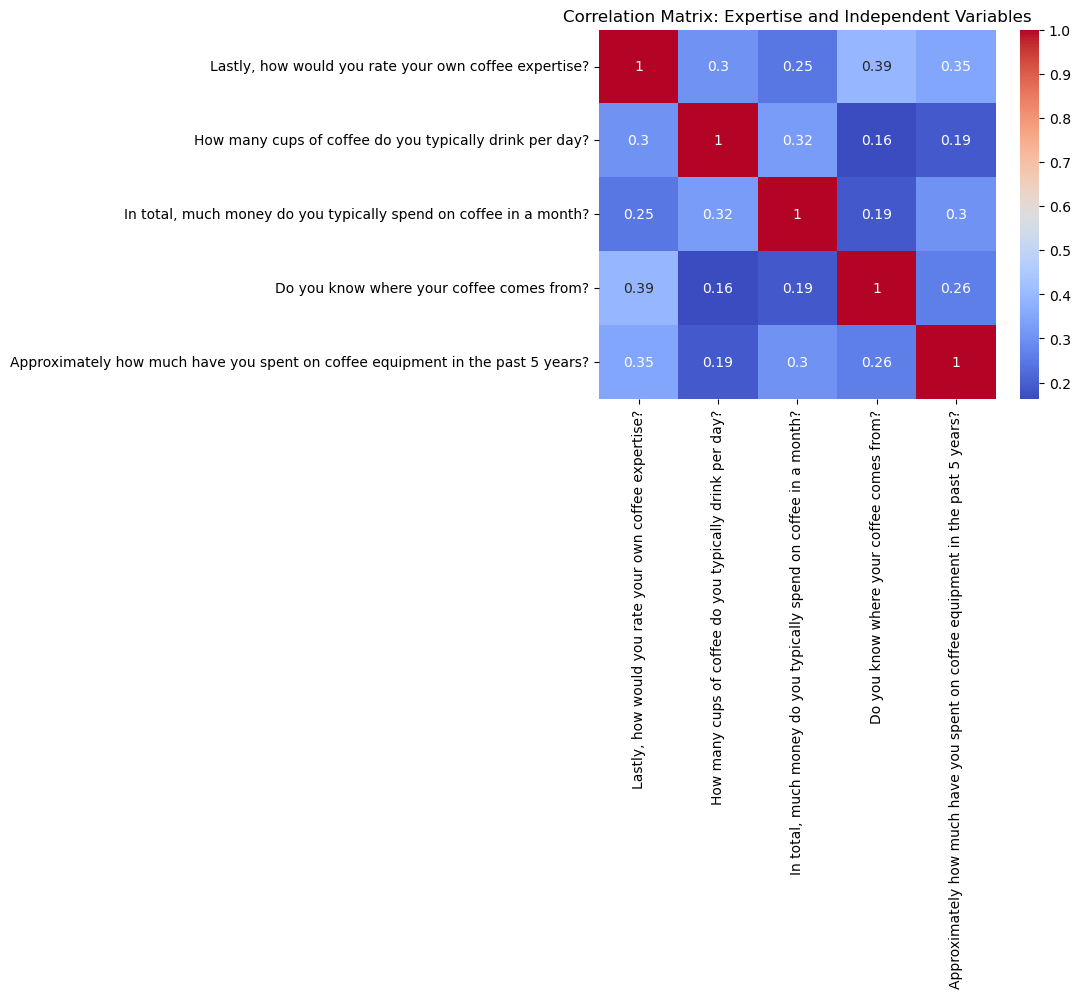

In [16]:
### 모든 변수열들을 상관계수 및 시각화 하기엔 문자열이 너무 많아서 포기함.
# 상관계수 계산 및 시각화
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix: Expertise and Independent Variables")
plt.show()

#### 주관적 답변은 신뢰성이 없음.

In [81]:
# 타겟 변수와 독립 변수 정의후 커피 선호도 질문과 나머지 4개 질문도 RF를 돌려봤으나 큰관련성은 보이지 않는다.
X = data[['How many cups of coffee do you typically drink per day?',
          'In total, much money do you typically spend on coffee in a month?',
          'Do you know where your coffee comes from?',
          'Approximately how much have you spent on coffee equipment in the past 5 years?']]
y = data['Lastly, what was your favorite overall coffee?']

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.21      0.09      0.12       265
         1.0       0.29      0.18      0.22       255
         2.0       0.24      0.17      0.20       255
         3.0       0.37      0.64      0.47       438

    accuracy                           0.33      1213
   macro avg       0.28      0.27      0.25      1213
weighted avg       0.29      0.33      0.29      1213



In [83]:
# 피처 중요도 계산
feature_importances = model.feature_importances_

# 데이터프레임 생성
feature_names = X.columns
data_comparison = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 데이터프레임 출력
print(data_comparison)

# CSV 저장
data_comparison.to_csv("Feature_Importance_RF.csv", index=False)

                                             Feature  Importance
0  How many cups of coffee do you typically drink...    0.334936
3  Approximately how much have you spent on coffe...    0.301459
1  In total, much money do you typically spend on...    0.288563
2          Do you know where your coffee comes from?    0.075043


In [77]:
## 하지만 이건 커피 선호도에 영향력을 미치는 순서대로 정리한 자료이기 때문에 어떤 요소가 어떤 커피를 좋아하는데 영향을 미치는지는 모르므로 다항 로지스틱회귀도 진행했다.

# 다항 로지스틱 회귀
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# 모델 계수 확인
coefficients = pd.DataFrame(model.coef_, columns=X.columns, index=model.classes_)

# 모델 계수를 데이터프레임으로 변환
coefficients = pd.DataFrame(model.coef_, columns=X.columns, index=model.classes_)
print(coefficients)

# CSV로 저장
coefficients.to_csv("Multinomial_Logistic_Regression_Coefficients.csv", index_label="Class")

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       265
         1.0       0.36      0.20      0.26       255
         2.0       0.30      0.11      0.16       255
         3.0       0.39      0.87      0.54       438

    accuracy                           0.38      1213
   macro avg       0.26      0.29      0.24      1213
weighted avg       0.28      0.38      0.28      1213

     How many cups of coffee do you typically drink per day?  \
0.0                                          -0.038882         
1.0                                          -0.052220         
2.0                                           0.119487         
3.0                                          -0.028385         

     In total, much money do you typically spend on coffee in a month?  \
0.0                                           0.001506                   
1.0                                           0.001087                   
2.0                   

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels

#### 데이터 분석이라고 부르기 민망한 수준의 정확도이다. 하지만 커피 출처를 알고 있는 사람일수록 Coffee D선호, 커피를 많이 마실수록 Coffee C선호, 커피 지출 변수는 선호도에 영향을 미친다고 보기 좀 어려운거같다. 왜 RF랑 다르게 나오는지 이유를 알기 힘들다.

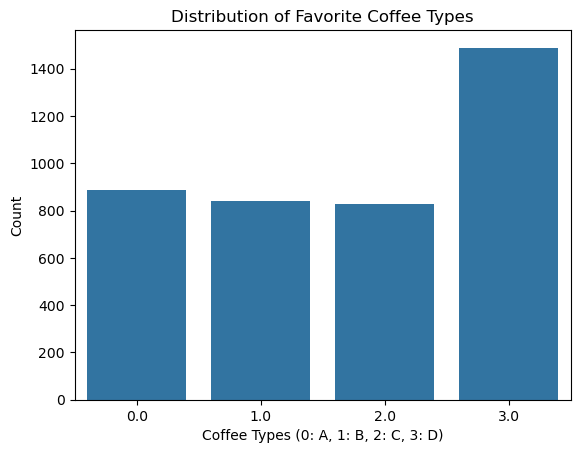

In [58]:
## 그외 부가 정보들
# 타겟 변수 분포 확인  ### 애초에 D가 인기가 가장 많다.
sns.countplot(x='Lastly, what was your favorite overall coffee?', data=data)
plt.title("Distribution of Favorite Coffee Types")
plt.xlabel("Coffee Types (0: A, 1: B, 2: C, 3: D)")
plt.ylabel("Count")
plt.show()

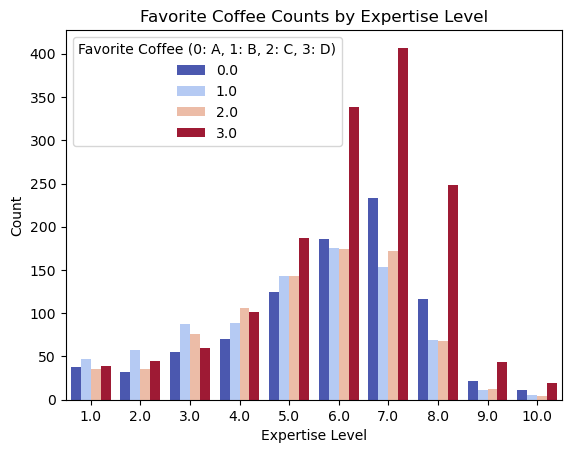

In [21]:
# 주관적인 커피 전문성 수준별 선호 커피 데이터 개수
grouped_data = data.groupby(['Lastly, how would you rate your own coffee expertise?', 
                             'Lastly, what was your favorite overall coffee?']).size().reset_index(name='Count')

# 시각화
sns.barplot(x='Lastly, how would you rate your own coffee expertise?', 
            y='Count', 
            hue='Lastly, what was your favorite overall coffee?', 
            data=grouped_data, palette='coolwarm')

plt.title('Favorite Coffee Counts by Expertise Level')
plt.xlabel('Expertise Level')
plt.ylabel('Count')
plt.legend(title='Favorite Coffee (0: A, 1: B, 2: C, 3: D)')
plt.show()


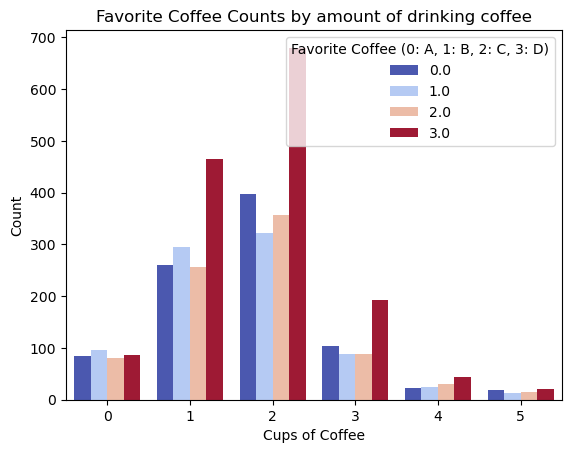

In [22]:
# 커피 섭취량별 선호 커피
grouped_data = data.groupby([ 'How many cups of coffee do you typically drink per day?', 
                             'Lastly, what was your favorite overall coffee?']).size().reset_index(name='Count')

# 시각화
sns.barplot(x= 'How many cups of coffee do you typically drink per day?', 
            y='Count', 
            hue='Lastly, what was your favorite overall coffee?', 
            data=grouped_data, palette='coolwarm')

plt.title('Favorite Coffee Counts by amount of drinking coffee')
plt.xlabel('Cups of Coffee')
plt.ylabel('Count')
plt.legend(title='Favorite Coffee (0: A, 1: B, 2: C, 3: D)')
plt.show()


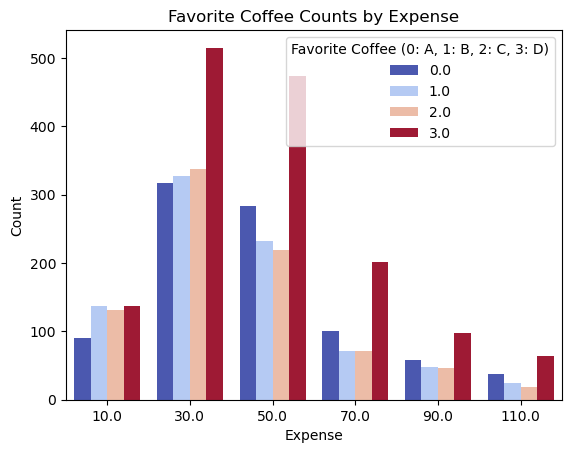

In [23]:
# 한달간 커피에 쓰는 돈 별 선호 커피
grouped_data = data.groupby(['In total, much money do you typically spend on coffee in a month?', 
                             'Lastly, what was your favorite overall coffee?']).size().reset_index(name='Count')

# 시각화
sns.barplot(x= 'In total, much money do you typically spend on coffee in a month?', 
            y='Count', 
            hue='Lastly, what was your favorite overall coffee?', 
            data=grouped_data, palette='coolwarm')

plt.title('Favorite Coffee Counts by Expense')
plt.xlabel('Expense')
plt.ylabel('Count')
plt.legend(title='Favorite Coffee (0: A, 1: B, 2: C, 3: D)')
plt.show()


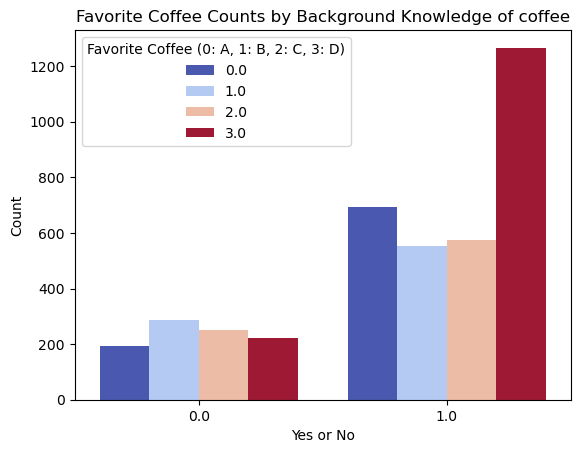

In [24]:
#배경지식 별 선호 커피
grouped_data = data.groupby(['Do you know where your coffee comes from?', 
                             'Lastly, what was your favorite overall coffee?']).size().reset_index(name='Count')

# 시각화
sns.barplot(x= 'Do you know where your coffee comes from?', 
            y='Count', 
            hue='Lastly, what was your favorite overall coffee?', 
            data=grouped_data, palette='coolwarm')

plt.title('Favorite Coffee Counts by Background Knowledge of coffee')
plt.xlabel('Yes or No')
plt.ylabel('Count')
plt.legend(title='Favorite Coffee (0: A, 1: B, 2: C, 3: D)')
plt.show()


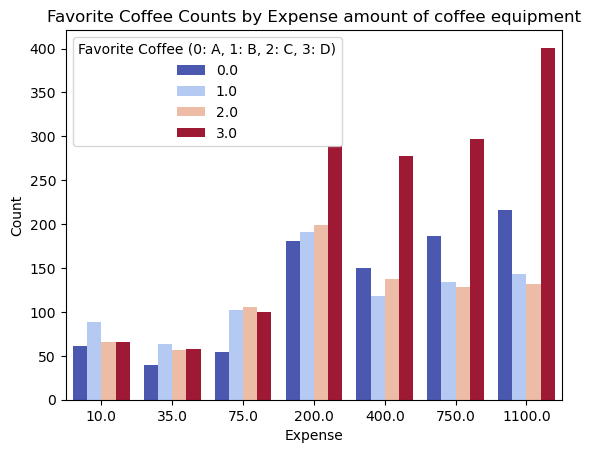

In [25]:
# 5년간 커피 장비에 쓴 돈 별 선호 커피
grouped_data = data.groupby(['Approximately how much have you spent on coffee equipment in the past 5 years?', 
                             'Lastly, what was your favorite overall coffee?']).size().reset_index(name='Count')

# 시각화
sns.barplot(x= 'Approximately how much have you spent on coffee equipment in the past 5 years?', 
            y='Count', 
            hue='Lastly, what was your favorite overall coffee?', 
            data=grouped_data, palette='coolwarm')

plt.title('Favorite Coffee Counts by Expense amount of coffee equipment')
plt.xlabel('Expense')
plt.ylabel('Count')
plt.legend(title='Favorite Coffee (0: A, 1: B, 2: C, 3: D)')
plt.show()


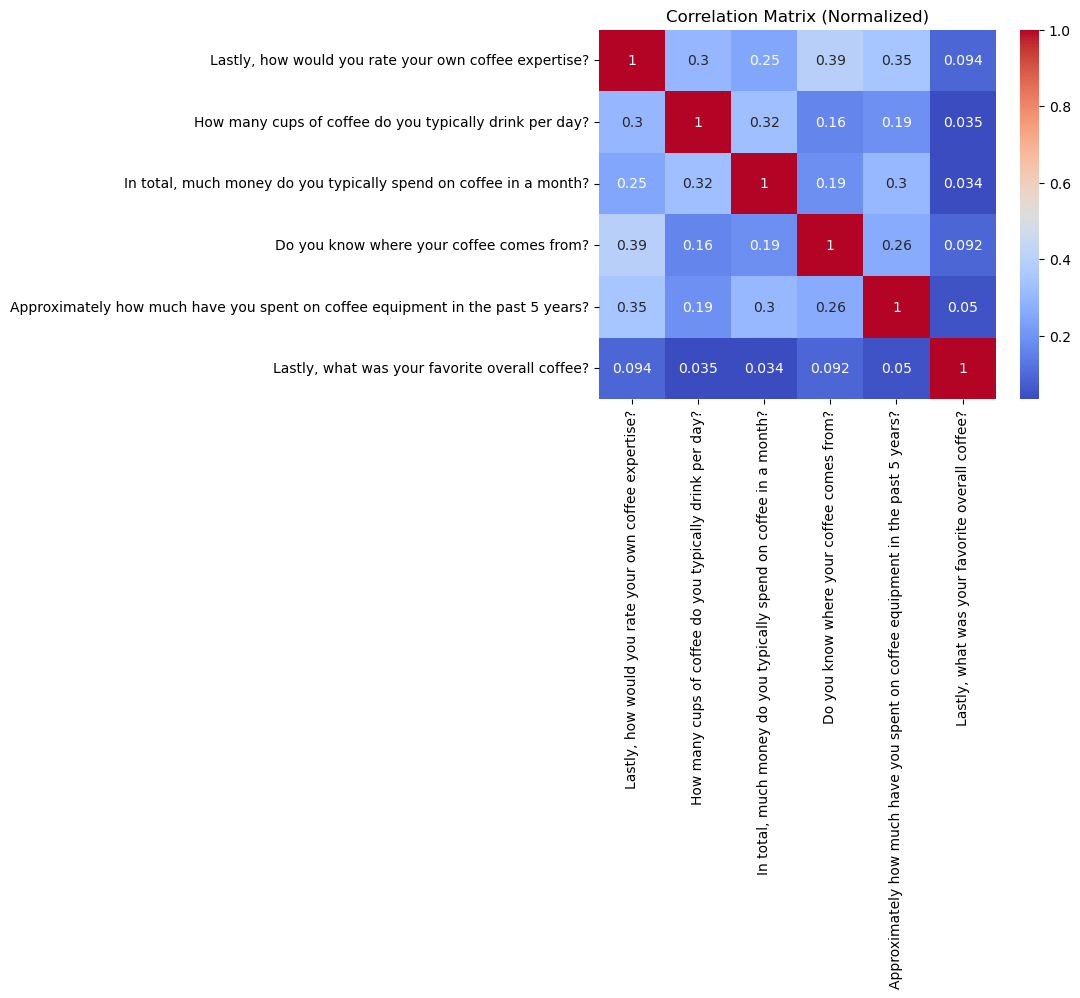

In [26]:
df2= data[['Lastly, how would you rate your own coffee expertise?',
    'How many cups of coffee do you typically drink per day?',
    'In total, much money do you typically spend on coffee in a month?',
    'Do you know where your coffee comes from?',
    'Approximately how much have you spent on coffee equipment in the past 5 years?',
    'Lastly, what was your favorite overall coffee?']]
correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Normalized)")
plt.show()

#### 커피에 대한 전문성과 커피 선호도에 대해 상관관계 분석을 진행했다. 일단 스스로 자신의 커피 배경지식 수준을 평가한 질문의 답은 그렇게 신뢰성있게 보이지 않는다. 또한 위 절대적 양을 나타낸 그래프로 보아 처음에는 전문성과 선호도에 상관관계가 있어 전문적일 수록 Coffee D를 선호할 줄 알았는데 그냥 Coffee D를 절대적으로 많이 선호하는 것일 뿐 전문성과는 큰 상관관계가 없었다. 하지만 RF 모델에 따르면 하루 커피 섭취량, 커피 장비에 대한 지출, 월간 커피 지출, 커피 원산지 아는지에 관한 순으로 커피 선호도를 설명하는데 중요하다.

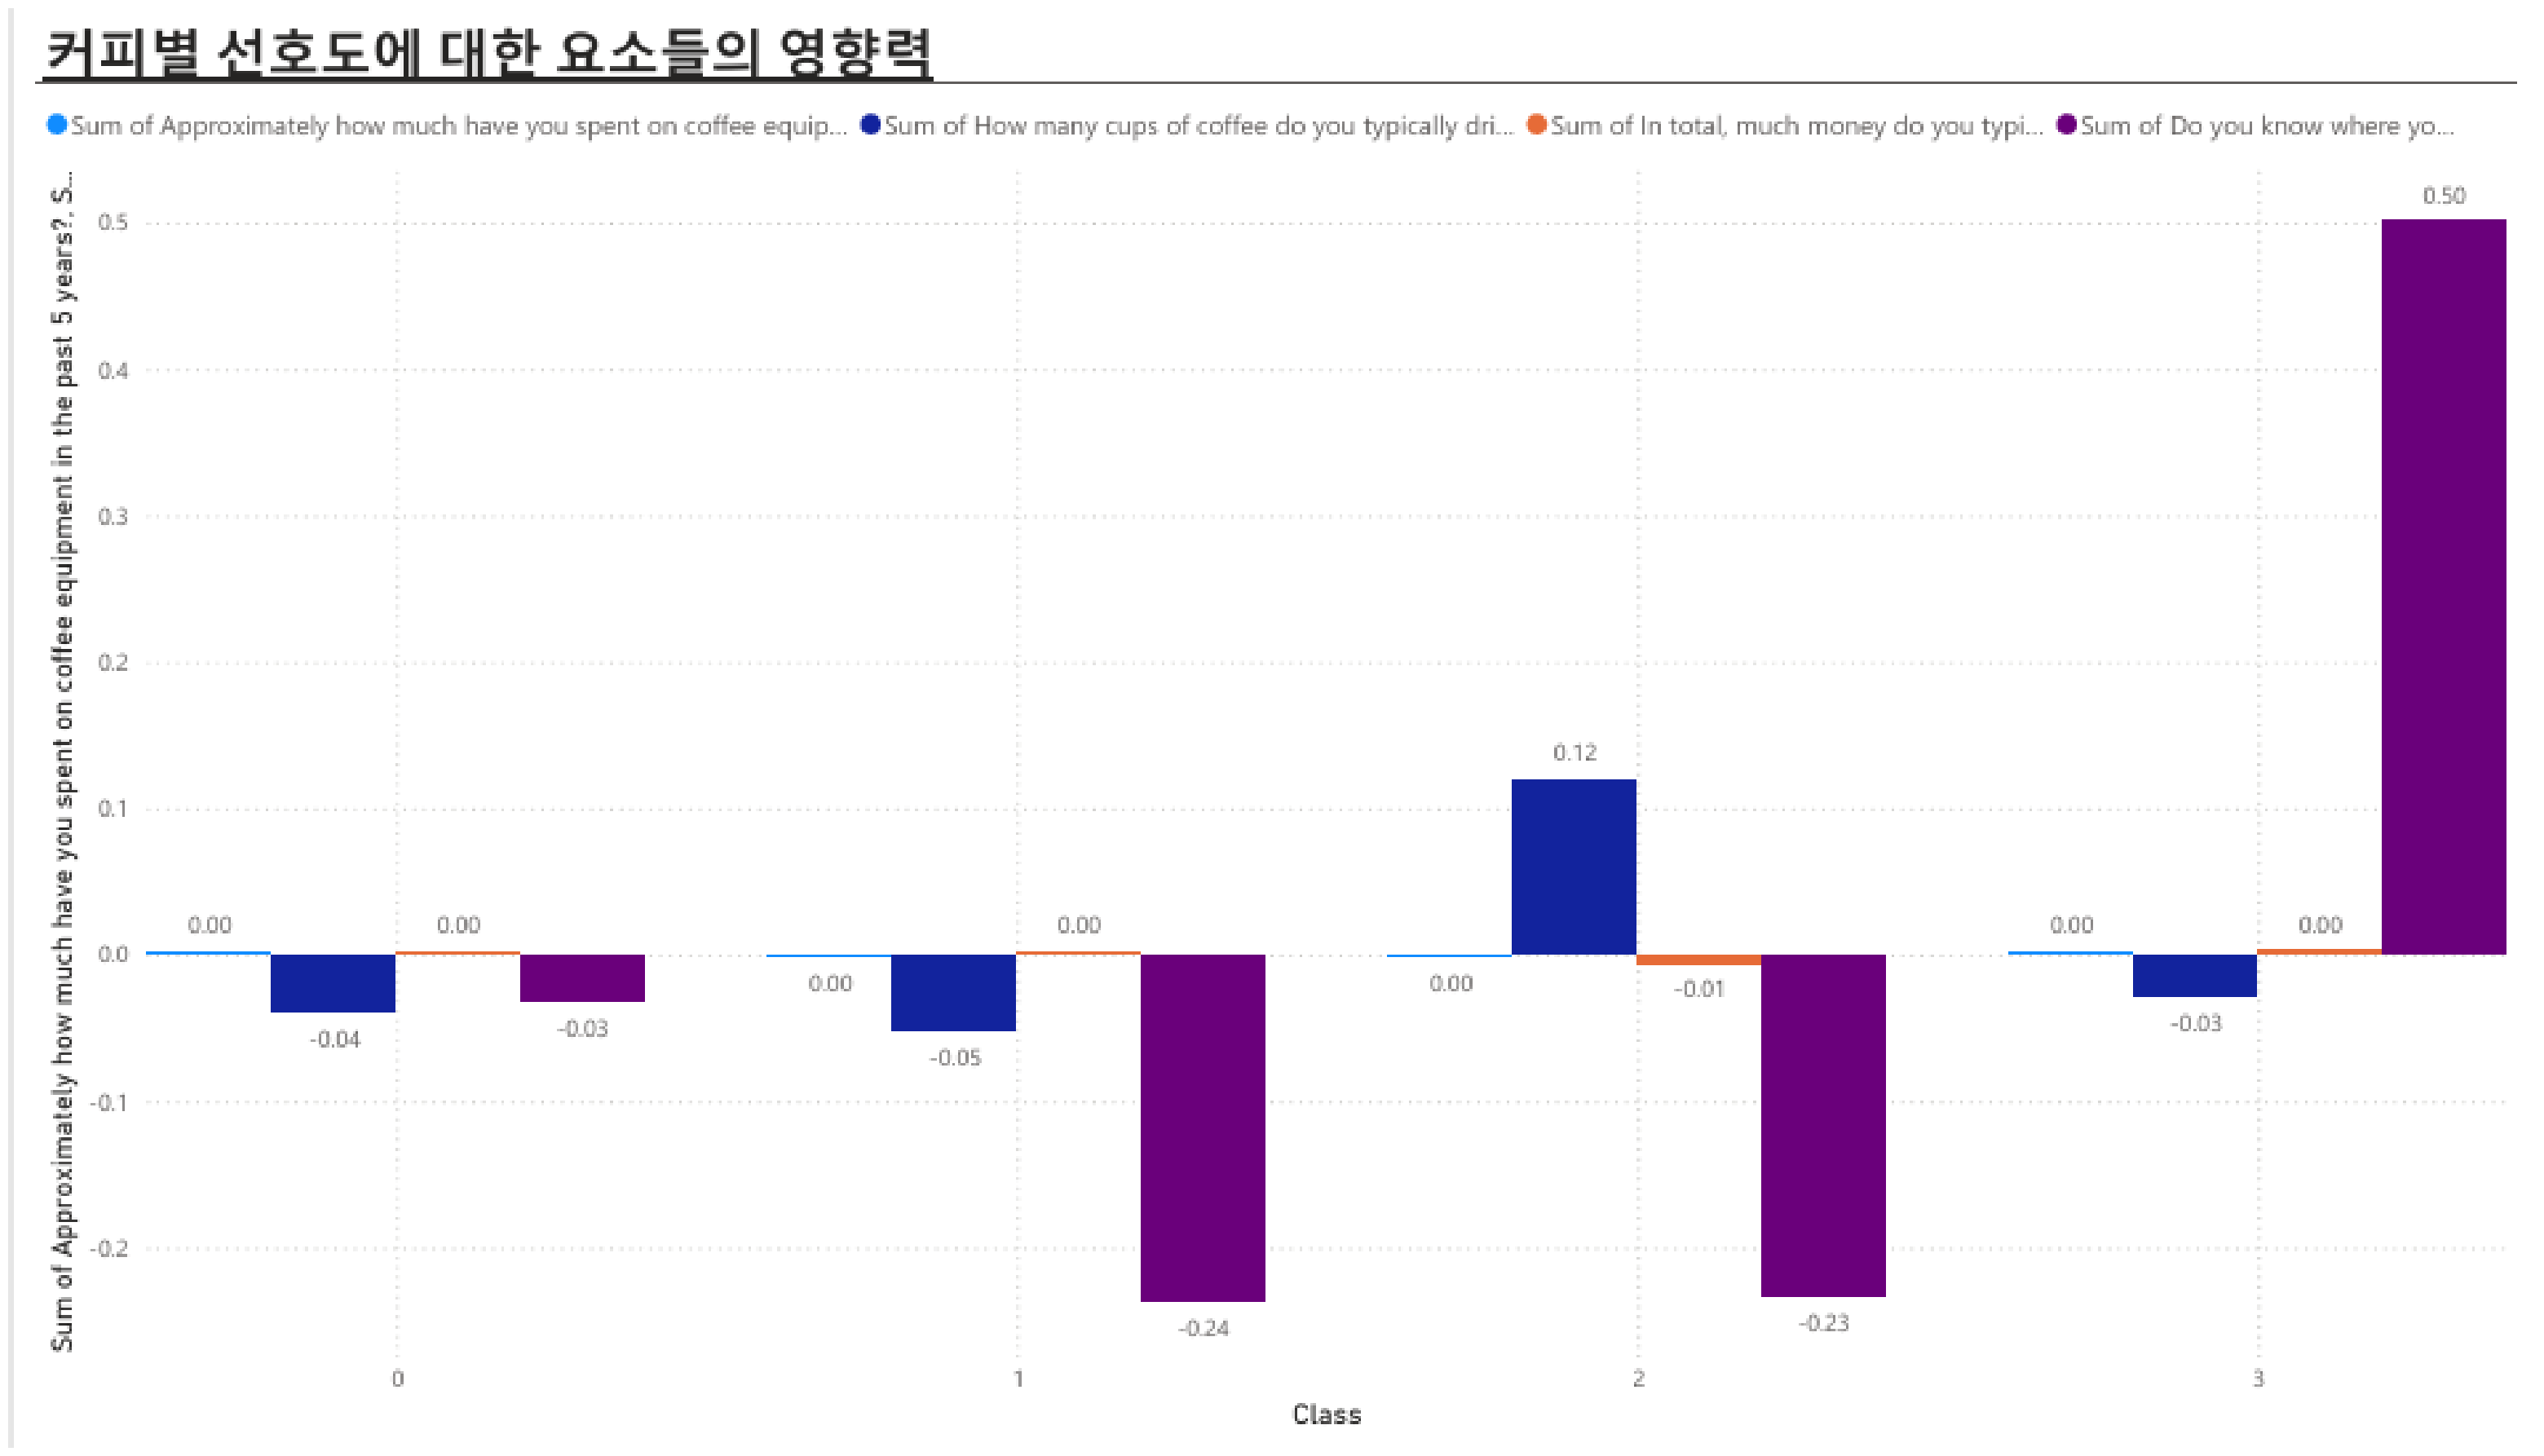

In [88]:
#마지막 BI 이미지 첨부 (로지스틱)
image_path = 'C:/Users/Lenovo/Downloads/graph.png'
img = mpimg.imread(image_path)
plt.figure(figsize=(40, 30))
plt.imshow(img)
plt.axis('off')  
plt.show()